# Model for Nature Conservancy Fisheries Kaggle Competition

#### Dependencies

In [9]:
import fish_data as fd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import os

#### Helper functions

In [10]:
help(fd)

Help on module fish_data:

NAME
    fish_data

DESCRIPTION
    fish_data module contains the helper functions for the model build of the
    Nature Conservancy Fisheries Kaggle Competition.
    
    Dependencies:
        * numpy as np
        * os
        * scipy.ndimage as ndimage
        * scipy.misc as misc
        * scipy.special as special
        * matplotlib.pyplot as plt
    
    # TODO : Make a test for mutation in make_batch to ensure observed overfitting
    # is due to model parameters and not to me simply having had repeated each image
    # over and over in the training set.

FUNCTIONS
    count_nodes(std_y, std_x, pool_steps, final_depth)
        Calculates the number of flattened nodes after a number of 'VALID' pool
        steps of strides = [1,2,2,1]
    
    generate_epoch_set_list_and_label_array(min_each)
        Function to generate a list of filenames to be used for each training epoch
        with a corresponding label array.  Most file names will be used  multi

#### Generate the list of filenames for balanced training batch collections with corresponding label array

In [11]:
min_each = 2000
pre_X, pre_y = fd.generate_epoch_set_list_and_label_array(min_each)

'ALB' set contains 2000 filenames from which to sample
'BET' set contains 2000 filenames from which to sample
'DOL' set contains 2000 filenames from which to sample
'LAG' set contains 2000 filenames from which to sample
'NoF' set contains 2000 filenames from which to sample
'OTHER' set contains 2000 filenames from which to sample
'SHARK' set contains 2000 filenames from which to sample
'YFT' set contains 2000 filenames from which to sample

Tests
     Master list of filenames contains 8 * min_each filenames: True
     Label is assigned only once per row entry: True
     There are 'min_each' labels for each fish column: True


#### Split into training and validation sets

In [12]:
valid_size = 500
X_train_filenames, X_valid_filenames, y_train, y_valid = train_test_split(pre_X, pre_y, test_size = valid_size)

In [13]:
print("File names in 'X_train_filenames: {}".format(len(X_train_filenames)))
print("Shape of y_train: {}".format(y_train.shape))
print("File names in 'X_valid_filenames: {}".format(len(X_valid_filenames)))
print("Shape of y_valid: {}".format(y_valid.shape))



File names in 'X_train_filenames: 15500
Shape of y_train: (15500, 8)
File names in 'X_valid_filenames: 500
Shape of y_valid: (500, 8)


#### Set the master standardize parameters

In [14]:
std_y = 500
std_x = 750
print("Aspect ratio: {}".format(std_x/std_y))

Aspect ratio: 1.5


#### Download and standardize the validation image set into the environment.

['data/train/YFT/img_02846.jpg', 'data/train/YFT/img_05400.jpg'] ['data/train/DOL/img_03727.jpg', 'data/train/DOL/img_01628.jpg']
Fn `make_batch` spans the end of an epoch correctly: True
Fn `make_label` spans the end of an epoch correctly: True
[ 0.  0.  0.  0.  0.  0.  0.  1.]


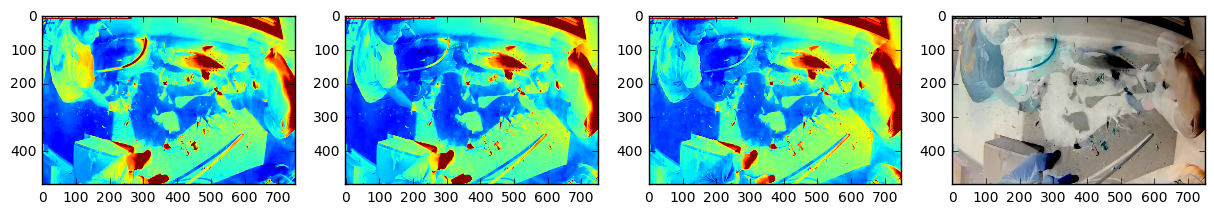

[ 0.  0.  0.  0.  0.  0.  0.  1.]


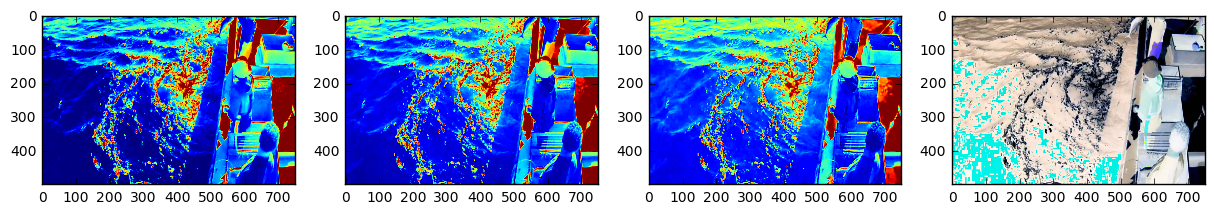

[ 0.  0.  0.  0.  0.  0.  0.  1.]


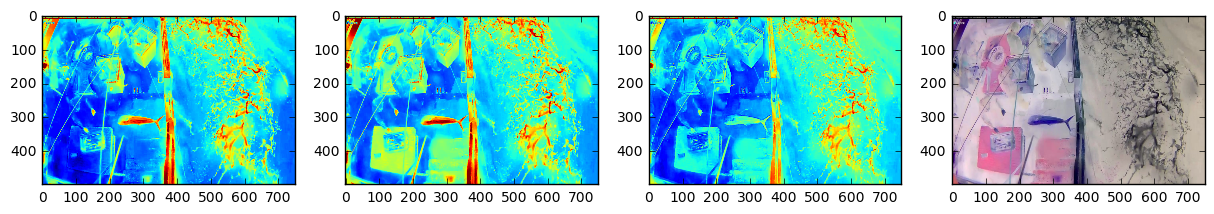

[ 0.  0.  1.  0.  0.  0.  0.  0.]


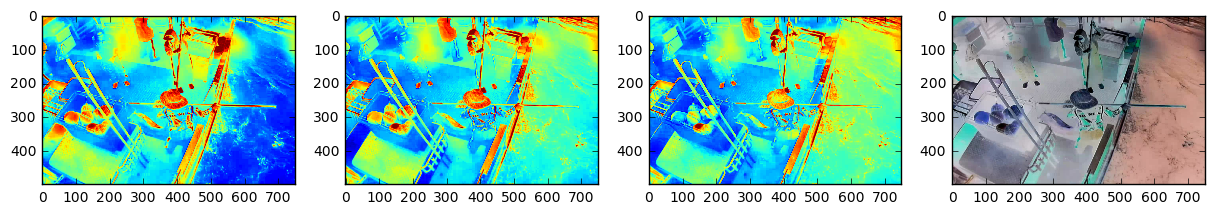

In [15]:
print(X_valid_filenames[-2:], X_valid_filenames[:2])
X_test = fd.make_batch(X_valid_filenames, len(X_valid_filenames)-2, 4, std_y, std_x, normalize = False, mutate = False) #make_batch to straddle the end of epoch
print("Fn `make_batch` spans the end of an epoch correctly: {}".format(X_test.shape == (4,std_y, std_x, 3)))
y_test = fd.make_label(y_valid, y_valid.shape[0]-2,4)
print("Fn `make_label` spans the end of an epoch correctly: {}".format(y_test.shape == (4, 8)))

for i in range(4):
    print(y_test[i,:])
    fd.show_panel(X_test[i])

In [16]:

X_valid = fd.make_batch(X_valid_filenames, 0, len(X_valid_filenames), std_y, std_x, normalize = True, mutate = False)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/ccthomps/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-89124ef9a344>", line 2, in <module>
    X_valid = fd.make_batch(X_valid_filenames, 0, len(X_valid_filenames), std_y, std_x, normalize = True, mutate = False)
  File "/Users/ccthomps/Documents/Python Files/Kaggle Competitions/Nature Conservancy Fisheries/fish_data.py", line 183, in make_batch
    arr = np.vstack([arr, image_norm])
  File "/Users/ccthomps/anaconda/lib/python3.5/site-packages/numpy/core/shape_base.py", line 234, in vstack
    return _nx.concatenate([atleast_2d(_m) for _m in tup], 0)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ccthomps/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 1821, in showtraceback
    stb = value._

KeyboardInterrupt: 

In [ ]:
print("TEST")
print("  Shape of validation array is correct: {}".format(X_valid.shape == (valid_size, std_y, std_x, 3)))
print("  Average pixel value: {}".format(np.mean(X_valid)))

for i in range(3) :
    print(X_valid_filenames[i])
    plt.figure(figsize=(10,20))
    plt.subplot(1,4,1)
    plt.imshow(X_valid[i][:,:,0])
    plt.subplot(1,4,2)
    plt.imshow(X_valid[i][:,:,1])
    plt.subplot(1,4,3)
    plt.imshow(X_valid[i][:,:,2])
    plt.subplot(1,4,4)
    plt.imshow( ((X_valid[i]*255.0) + (255.0/2)).astype(int))
    plt.show()

## Graph and Session Runs

#### Graph parameters

In [ ]:
# General
num_channels = 3
num_labels = 8
batch_size = 100
stddev = 0.2

# convolution
kernel_sizes = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
stride = 1
conv_depths = [8, 8, 16, 16, 32, 32, 64, 64, 128, 128, 256, 256]
final_depth = conv_depths[-1]


#dropout
kp_hidden = 0.50

# fully connected
fc1_depth = 256
fc2_depth = 64

#regularization
beta = 1e-1 * (1/len(conv_depths))

# Learning rate
init_rate = 1e-2


In [ ]:
nodes = []
for i in range(12) :
    nodes.append(fd.count_nodes(std_y, std_x, i//2, conv_depths[i]))

plt.figure()
plt.plot(range(1,13), nodes, '-')
plt.xlabel('Layer')
plt.ylabel('Num of Nodes')
plt.yscale('log')
plt.xlim(0, 14)
plt.show()
    

#### Session parameters

In [ ]:
# epochs
num_epochs = 5
# path for tensorboard summary file to be written
logs_path = os.getcwd()+'/TB_logs'
valid_every = 50

In [ ]:
%run -i 'GRAPH.py'

In [ ]:
%run -i 'SESSION.py'